In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"StudentsPerformance (1) (1).csv")

In [3]:
data.shape

(1000, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We have 2 types of variables.
Numerical variables : which contains number as values
Categorical variables : which contains descriptions of groups or things.
In this Data set,

Numerical Variables are Math score, Reading score and Writing score.

Categorical Variables are Gender, Race/ethnicity, Parental level of education, Lunch and Test preparation course.

In [5]:
data.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parental_education", 
                     "test preparation course":"prep_course","math score":"maths","reading score":"reading",
                     "writing score":"writing"},inplace=True)
for col in data.columns:
    print(col,':', len(data[col].unique()), 'labels')

gender : 2 labels
ethnicity : 5 labels
parental_education : 6 labels
lunch : 2 labels
prep_course : 2 labels
maths : 81 labels
reading : 72 labels
writing : 77 labels


#### Here, we observe how many unique labels we have in our dataframe  

In [6]:
print(data.gender.value_counts())
print("************************************************************")
print(data.ethnicity.value_counts())
print("************************************************************")
print(data.parental_education.value_counts())
print("************************************************************")
print(data.lunch.value_counts())
print("************************************************************")
print(data.prep_course.value_counts())

female    518
male      482
Name: gender, dtype: int64
************************************************************
group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64
************************************************************
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_education, dtype: int64
************************************************************
standard        645
free/reduced    355
Name: lunch, dtype: int64
************************************************************
none         642
completed    358
Name: prep_course, dtype: int64


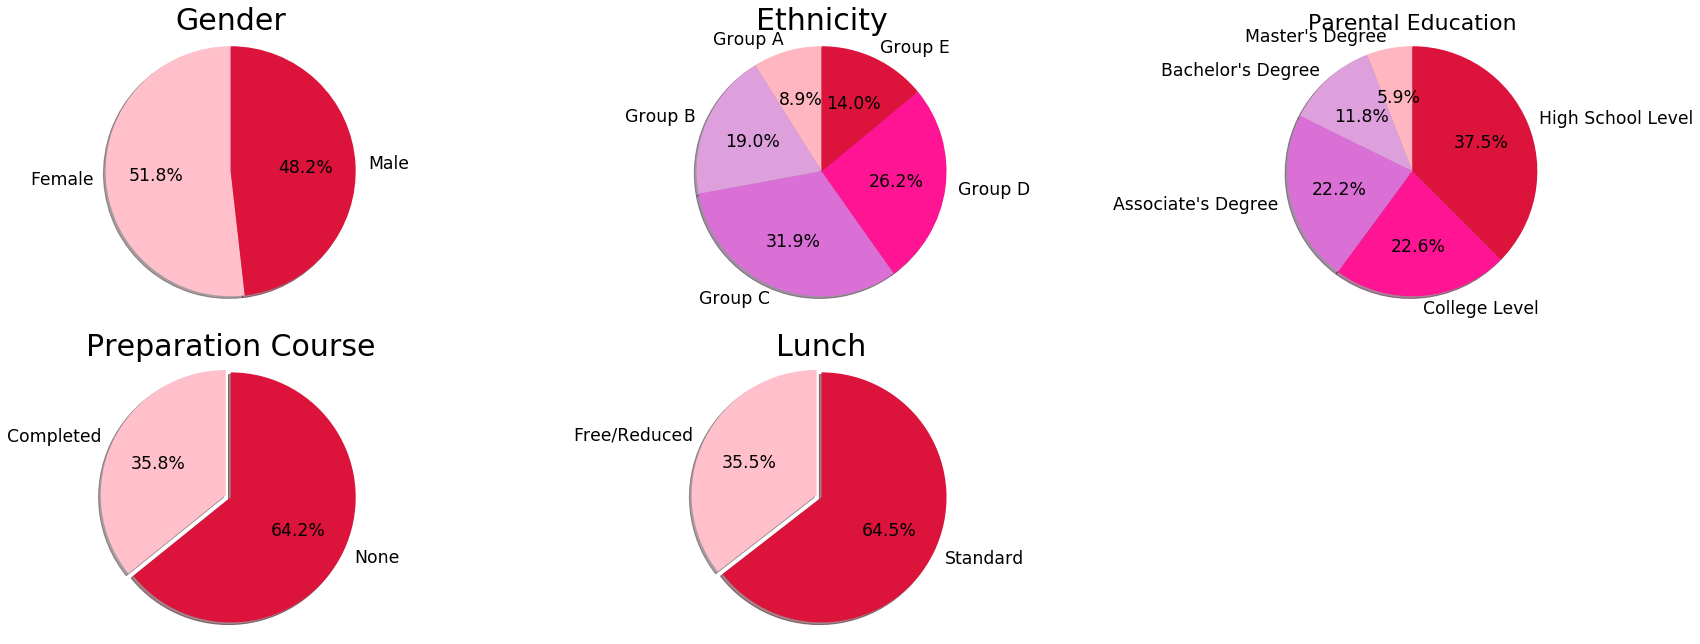

In [8]:
plt.rcParams['figure.figsize']=(30,11)

plt.subplot(2,3,1)
slices_1=[518,482]
activities_1=["Female","Male"]
cols1=['pink','crimson']
plt.pie(slices_1,labels=activities_1,colors=cols1,startangle=90,shadow=True,autopct='%1.1f%%',textprops={'size':'xx-large'}
       ,radius=1.15)
plt.title("Gender",fontsize=30)

plt.subplot(2,3,2) 
slices_2=[89,190,319,262,140]
activities_2=["Group A","Group B","Group C","Group D","Group E"]
cols2=['lightpink','plum','orchid','deeppink','crimson']
plt.pie(slices_2,labels=activities_2,colors=cols2,startangle=90,shadow=True,autopct='%1.1f%%',textprops={'size':'xx-large'}
       ,radius=1.15)
plt.title("Ethnicity",fontsize=30)

plt.subplot(2,3,3) 
slices_3=[59,118,222,226,375]
activities_3=["Master's Degree","Bachelor's Degree","Associate's Degree","College Level","High School Level"]
plt.pie(slices_3,labels=activities_3,colors=cols2,startangle=90,shadow=True,
        autopct='%1.1f%%',textprops={'size':'xx-large'},radius=1.15)
plt.title("Parental Education",fontsize=22)

plt.subplot(2,3,4) 
slices_4=[358,642]
activities_4=["Completed","None"]
cols4=['pink','crimson']
plt.pie(slices_4,labels=activities_4,colors=cols4,startangle=90,shadow=True,explode=(0.05,0),autopct='%1.1f%%'
       ,textprops={'size':'xx-large'},radius=1.15)
plt.title("Preparation Course",fontsize=30)

plt.subplot(2,3,5)
slices_5=[355,645]
activities_5=["Free/Reduced","Standard"]
plt.pie(slices_5,labels=activities_5,colors=cols4,startangle=90,shadow=True,explode=(0.05,0),autopct='%1.1f%%',
       textprops={'size':'xx-large'},radius=1.15)
plt.title("Lunch",fontsize=30)

plt.show()



From the above pie-charts we observe the shares of different labels in a column of a dataframe:

* Gender
  * The number of Female students are slightly more than Male students.   
* Ethnicity  
  * It is comprehended that the class have majority of students from ethnic Group C,followed by Group D,Group B,Group E and Group A.
3. Parental Education
   * Most of the parents have attended the college but the mojority of parents are qualified upto only High School.
4. Prepararion Course
   * Most of the students haven't completed the preparation course.
5. Lunch
   * The fees of the lunch is standard for most of the students but it is also waived for some students.



In [9]:
data['avg_score']=(data['maths']+data['reading']+data['writing'])/3
data.head(3)

,gender,ethnicity,parental_education,lunch,prep_course,maths,reading,writing,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667


(array([  1.,   1.,   7.,  21.,  73., 182., 256., 261., 146.,  52.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

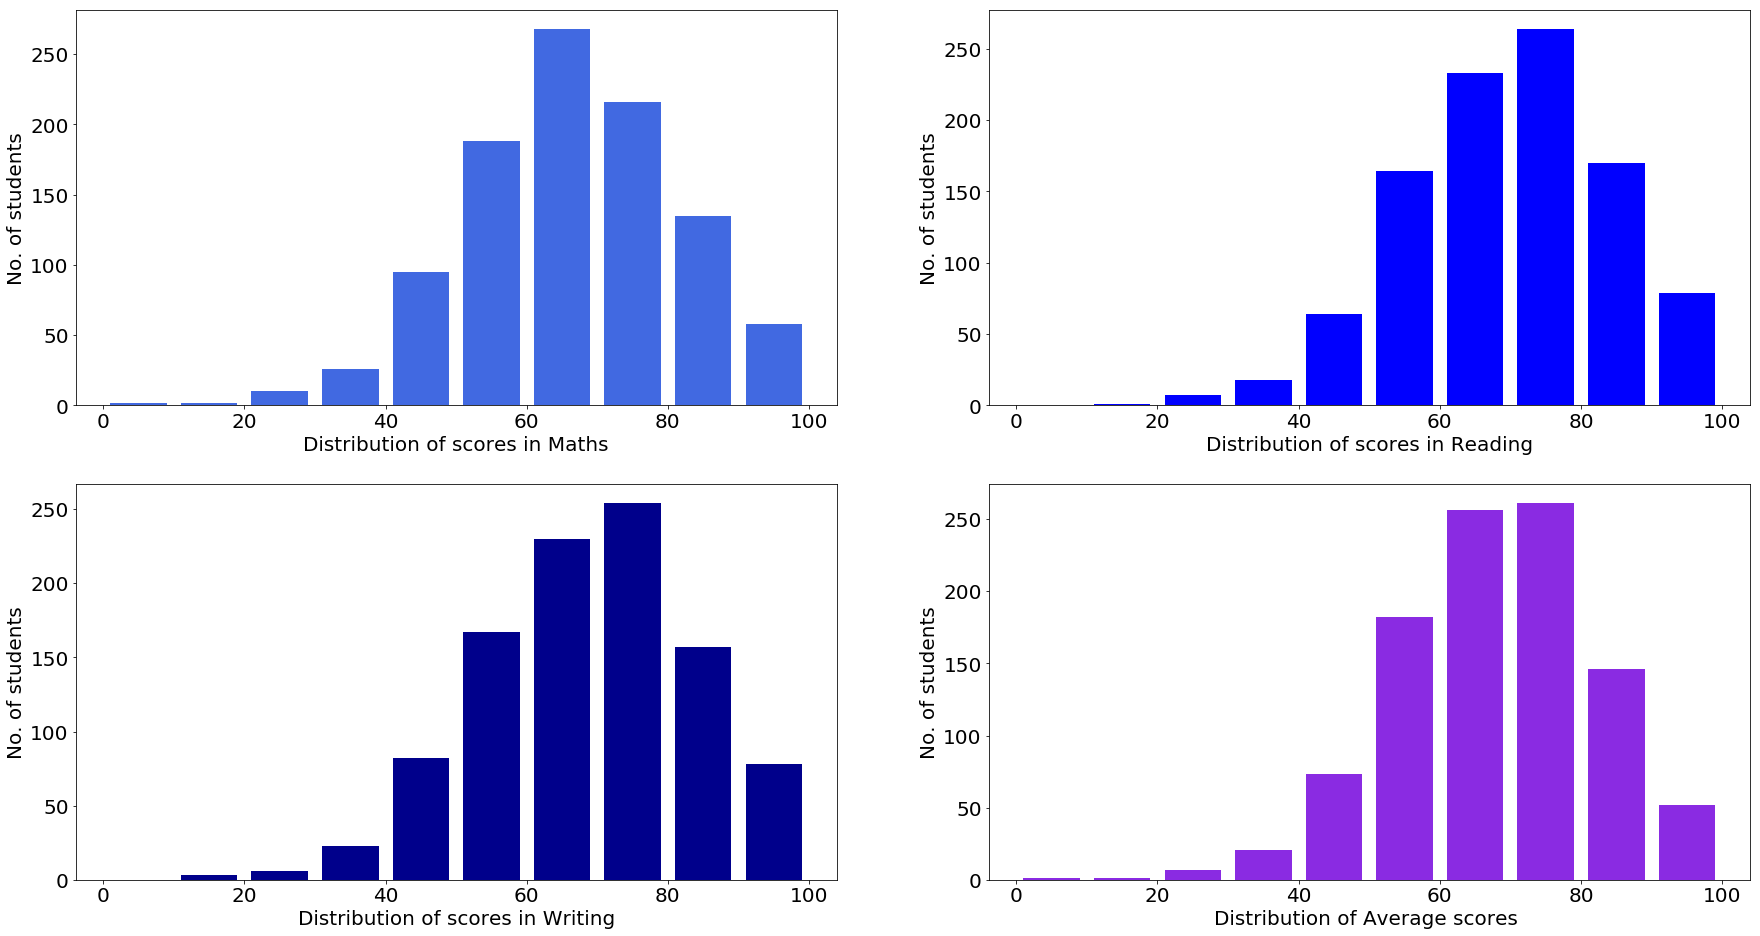

In [10]:
plt.rcParams['figure.figsize']=(30,16)

m=data.maths
r=data.reading
w=data.writing
a=data.avg_score
bins=[0,10,20,30,40,50,60,70,80,90,100]

plt.subplot(2,2,1)
plt.ylabel("No. of students",fontsize=20)
plt.xlabel("Distribution of scores in Maths",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.hist(m,bins,histtype='bar',rwidth=0.8,color='royalblue')

plt.subplot(2,2,2)
plt.ylabel("No. of students",fontsize=20)
plt.xlabel("Distribution of scores in Reading",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.hist(r,bins,histtype='bar',rwidth=0.8,color='blue')

plt.subplot(2,2,3)
plt.ylabel("No. of students",fontsize=20)
plt.xlabel("Distribution of scores in Writing",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.hist(w,bins,histtype='bar',rwidth=0.8,color='darkblue')

plt.subplot(2,2,4)
plt.ylabel("No. of students",fontsize=20)
plt.xlabel("Distribution of Average scores ",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.hist(a,bins,histtype='bar',rwidth=0.8,color='blueviolet')




The above histograms shows the following insights

* Distribution of scores in Maths
  * Majority of students have scored between 60-70 marks.
* Distribution of scores in Reading  
  * Majority of students have scored between 70-80 marks.
* Distribution of scores in Writing
  * Majority of students have scored between 70-80 marks.
* Distribution of Average Scores  
  * Majority of students have scored between 60-80 marks.  

In [11]:
group_a=data[data.ethnicity=='group A']
group_b=data[data.ethnicity=='group B']
group_c=data[data.ethnicity=='group C']
group_d=data[data.ethnicity=='group D']
group_e=data[data.ethnicity=='group E']

Maths_a=group_a.maths.mean()
Reading_a=group_a.reading.mean()
Writing_a=group_a.writing.mean()
Avg_score_a=group_a.avg_score.mean()

Maths_b=group_b.maths.mean()
Reading_b=group_b.reading.mean()
Writing_b=group_b.writing.mean()
Avg_score_b=group_b.avg_score.mean()

Maths_c=group_c.maths.mean()
Reading_c=group_c.reading.mean()
Writing_c=group_c.writing.mean()
Avg_score_c=group_c.avg_score.mean()

Maths_d=group_d.maths.mean()
Reading_d=group_d.reading.mean()
Writing_d=group_d.writing.mean()
Avg_score_d=group_d.avg_score.mean()

Maths_e=group_e.maths.mean()
Reading_e=group_e.reading.mean()
Writing_e=group_e.writing.mean()
Avg_score_e=group_e.avg_score.mean()

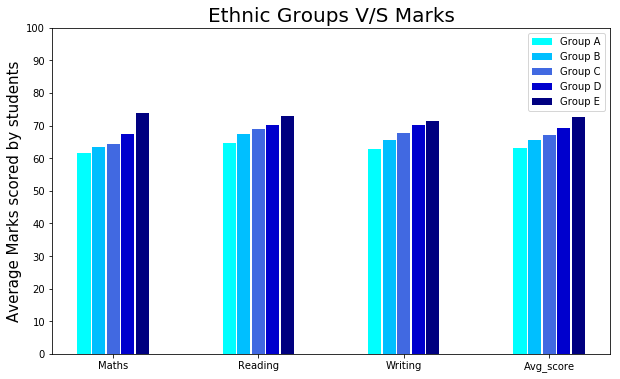

In [12]:
plt.rcParams['figure.figsize']=(10,6)

objects = ('Maths','Reading','Writing', 'Avg_score')

y_pos =[0.20,2.20,4.20,6.20]
y_posb =[0.40,2.40,4.40,6.40]
y_posc =[0.60,2.60,4.60,6.60]
y_posd =[0.80,2.80,4.80,6.80]
y_pose =[1,3,5,7]
performance_a= [Maths_a,Reading_a,Writing_a,Avg_score_a]
performance_b= [Maths_b,Reading_b,Writing_b,Avg_score_b]
performance_c= [Maths_c,Reading_c,Writing_c,Avg_score_c]
performance_d= [Maths_d,Reading_d,Writing_d,Avg_score_d]
performance_e= [Maths_e,Reading_e,Writing_e,Avg_score_e]

plt.bar(y_pos, performance_a, width=0.18,color='cyan',label="Group A")
plt.bar(y_posb, performance_b,width=0.18,color='deepskyblue',label="Group B")
plt.bar(y_posc, performance_c,width=0.18,color='royalblue',label="Group C")
plt.bar(y_posd, performance_d,width=0.18,color='mediumblue',label="Group D")
plt.bar(y_pose, performance_e,width=0.18,color='navy',label="Group E")

plt.xticks(y_posc, objects)

score=np.arange(0,110,10)
plt.yticks(score)

plt.ylabel('Average Marks scored by students',fontsize=15)
plt.title('Ethnic Groups V/S Marks',fontsize=20)
plt.legend()
plt.show()

The above bar-graph shows the distribution of average marks of different subjects scored by students of different ethnic groups

It cleary dipicts that marks scored by the students of ethnic group E is highest in all subjects.

In [13]:
subjects=['maths','reading','writing','avg_score']
dataset=data.groupby('gender')[subjects].mean()
print(dataset)
print("**************")
print(dataset.T)

            maths    reading    writing  avg_score
gender                                            
female  63.633205  72.608108  72.467181  69.569498
male    68.728216  65.473029  63.311203  65.837483
**************
gender        female       male
maths      63.633205  68.728216
reading    72.608108  65.473029
writing    72.467181  63.311203
avg_score  69.569498  65.837483


In [14]:
index=np.arange(len(subjects))
score_label=np.arange(0,110,10)
male_means=list(dataset.T['male'])
female_means=list(dataset.T['female'])

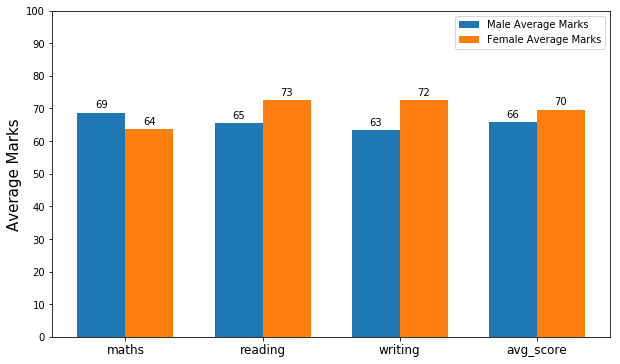

In [15]:
bar_width=0.35
fig ,ax=plt.subplots()
barMale=ax.bar(index - bar_width/2,male_means,bar_width,label='Male Average Marks')
barFemale=ax.bar(index + bar_width/2, female_means, bar_width, label='Female Average Marks')

ax.set_xticks(index)
ax.set_xticklabels(subjects,fontsize=12)
ax.set_ylabel("Average Marks",fontsize=15)
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

for i in index:
    ax.annotate('{0:.0f}'.format(barMale[i].get_height()),
                xy=(barMale[i].get_x() + barMale[i].get_width() / 2, barMale[i].get_height()),
                xytext=(0,3),
                textcoords='offset points',
                ha='center',
                va='bottom'
               )
for i in index:
    ax.annotate('{0:.0f}'.format(barFemale[i].get_height()),
                xy=(barFemale[i].get_x() + barFemale[i].get_width() / 2,barFemale[i].get_height()),
                xytext=(0,3),
                textcoords='offset points',
                ha='center',
                va='bottom'
               )   
ax.legend()
plt.rcParams['figure.figsize']=(9,7)
plt.show()

The above bar-graph shows that:
* In maths, male students have performed better than female students.
* In reading, female students have significantly better than male students.
* In writing, female students have significantly better than male students.

On the contrary, Female students have performed better than male students.

In [16]:
master_degree=data[data.parental_education=="master's degree"]
bachelor_degree=data[data.parental_education=="bachelor's degree"]
associate_degree=data[data.parental_education=="associate's degree"]
some_college=data[data.parental_education=="some college"]
high_school1=data[data.parental_education=="high school"] 
high_school2=data[data.parental_education=="some high school"]
high_school=pd.concat([high_school1,high_school2],ignore_index=True)

In [17]:
master_degree_maths=master_degree.maths.mean()
master_degree_reading=master_degree.reading.mean()
master_degree_writing=master_degree.writing.mean()
master_degree_avg=master_degree.avg_score.mean()

bachelor_degree_maths=bachelor_degree.maths.mean()
bachelor_degree_reading=bachelor_degree.reading.mean()
bachelor_degree_writing=bachelor_degree.writing.mean()
bachelor_degree_avg=bachelor_degree.avg_score.mean()

associate_degree_maths=associate_degree.maths.mean()
associate_degree_reading=associate_degree.reading.mean()
associate_degree_writing=associate_degree.writing.mean()
associate_degree_avg=associate_degree.avg_score.mean()

some_college_maths=some_college.maths.mean()
some_college_reading=some_college.reading.mean()
some_college_writing=some_college.writing.mean()
some_college_avg=some_college.avg_score.mean()

high_school_maths=high_school.maths.mean()
high_school_reading=high_school.reading.mean()
high_school_writing=high_school.writing.mean()
high_school_avg=high_school.avg_score.mean()

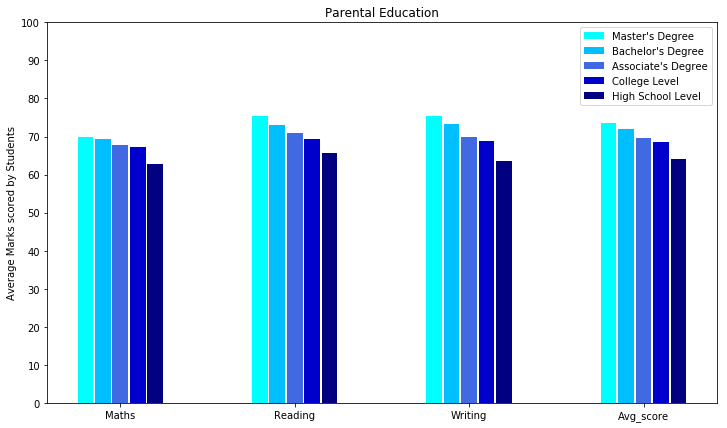

In [18]:
plt.rcParams['figure.figsize']=(12,7)
objects = ('Maths','Reading','Writing', 'Avg_score')
y_pos1 =[0,2,4,6]
y_pos2 =[0.20,2.20,4.20,6.20]
y_pos3 =[0.40,2.40,4.40,6.40]
y_pos4 =[0.60,2.60,4.60,6.60]
y_pos5 =[0.80,2.80,4.80,6.80]

performance_1= [master_degree_maths,master_degree_reading,master_degree_reading,master_degree_avg]
performance_2= [bachelor_degree_maths,bachelor_degree_reading,bachelor_degree_writing,bachelor_degree_avg]
performance_3= [associate_degree_maths,associate_degree_reading,associate_degree_writing,associate_degree_avg]
performance_4= [some_college_maths,some_college_reading,some_college_writing,some_college_avg]
performance_5= [high_school_maths,high_school_reading,high_school_writing,high_school_avg]

plt.bar(y_pos1, performance_1, width=0.18,color='cyan',label="Master's Degree")
plt.bar(y_pos2, performance_2,width=0.18,color='deepskyblue',label="Bachelor's Degree")
plt.bar(y_pos3, performance_3,width=0.18,color='royalblue',label="Associate's Degree")
plt.bar(y_pos4, performance_4,width=0.18,color='mediumblue',label="College Level")
plt.bar(y_pos5, performance_5,width=0.18,color='navy',label="High School Level")

plt.xticks(y_pos3, objects)
score=np.arange(0,110,10)
plt.yticks(score)

plt.ylabel('Average Marks scored by Students')
plt.title('Parental Education')
plt.legend(loc="best")
plt.show()


The above bar-graph shows the distribution of average marks of different subjects scored by students on the basis of their parent's qualification. 

It cleary dipicts that marks scored by the students whose parent's qualifiacation is Master's Degree is highest in all subjects.

In [19]:
master_degree_male=master_degree[master_degree.gender=='male']
master_degree_female=master_degree[master_degree.gender=='female']
bachelor_degree_male=bachelor_degree[bachelor_degree.gender=='male']
bachelor_degree_female=bachelor_degree[bachelor_degree.gender=='female']
associate_degree_male=associate_degree[associate_degree.gender=='male']
associate_degree_female=associate_degree[associate_degree.gender=='female']
some_college_male=some_college[some_college.gender=='male']
some_college_female=some_college[some_college.gender=='female']
high_school_male=high_school[high_school.gender=='male']
high_school_female=high_school[high_school.gender=='female']


In [20]:
master_degree_maths1=master_degree_male.maths.mean()
master_degree_reading1=master_degree_male.reading.mean()
master_degree_writing1=master_degree_male.writing.mean()
master_degree_avg1=master_degree_male.avg_score.mean()

bachelor_degree_maths1=bachelor_degree_male.maths.mean()
bachelor_degree_reading1=bachelor_degree_male.reading.mean()
bachelor_degree_writing1=bachelor_degree_male.writing.mean()
bachelor_degree_avg1=bachelor_degree_male.avg_score.mean()

associate_degree_maths1=associate_degree_male.maths.mean()
associate_degree_reading1=associate_degree_male.reading.mean()
associate_degree_writing1=associate_degree_male.writing.mean()
associate_degree_avg1=associate_degree_male.avg_score.mean()

some_college_maths1=some_college_male.maths.mean()
some_college_reading1=some_college_male.reading.mean()
some_college_writing1=some_college_male.writing.mean()
some_college_avg1=some_college_male.avg_score.mean()

high_school_maths1=high_school_male.maths.mean()
high_school_reading1=high_school_male.reading.mean()
high_school_writing1=high_school_male.writing.mean()
high_school_avg1=high_school_male.avg_score.mean()

In [21]:
master_degree_maths2=master_degree_female.maths.mean()
master_degree_reading2=master_degree_female.reading.mean()
master_degree_writing2=master_degree_female.writing.mean()
master_degree_avg2=master_degree_female.avg_score.mean()

bachelor_degree_maths2=bachelor_degree_female.maths.mean()
bachelor_degree_reading2=bachelor_degree_female.reading.mean()
bachelor_degree_writing2=bachelor_degree_female.writing.mean()
bachelor_degree_avg2=bachelor_degree_female.avg_score.mean()

associate_degree_maths2=associate_degree_female.maths.mean()
associate_degree_reading2=associate_degree_female.reading.mean()
associate_degree_writing2=associate_degree_female.writing.mean()
associate_degree_avg2=associate_degree_female.avg_score.mean()

some_college_maths2=some_college_female.maths.mean()
some_college_reading2=some_college_female.reading.mean()
some_college_writing2=some_college_female.writing.mean()
some_college_avg2=some_college_female.avg_score.mean()

high_school_maths2=high_school_female.maths.mean()
high_school_reading2=high_school_female.reading.mean()
high_school_writing2=high_school_female.writing.mean()
high_school_avg2=high_school_female.avg_score.mean()

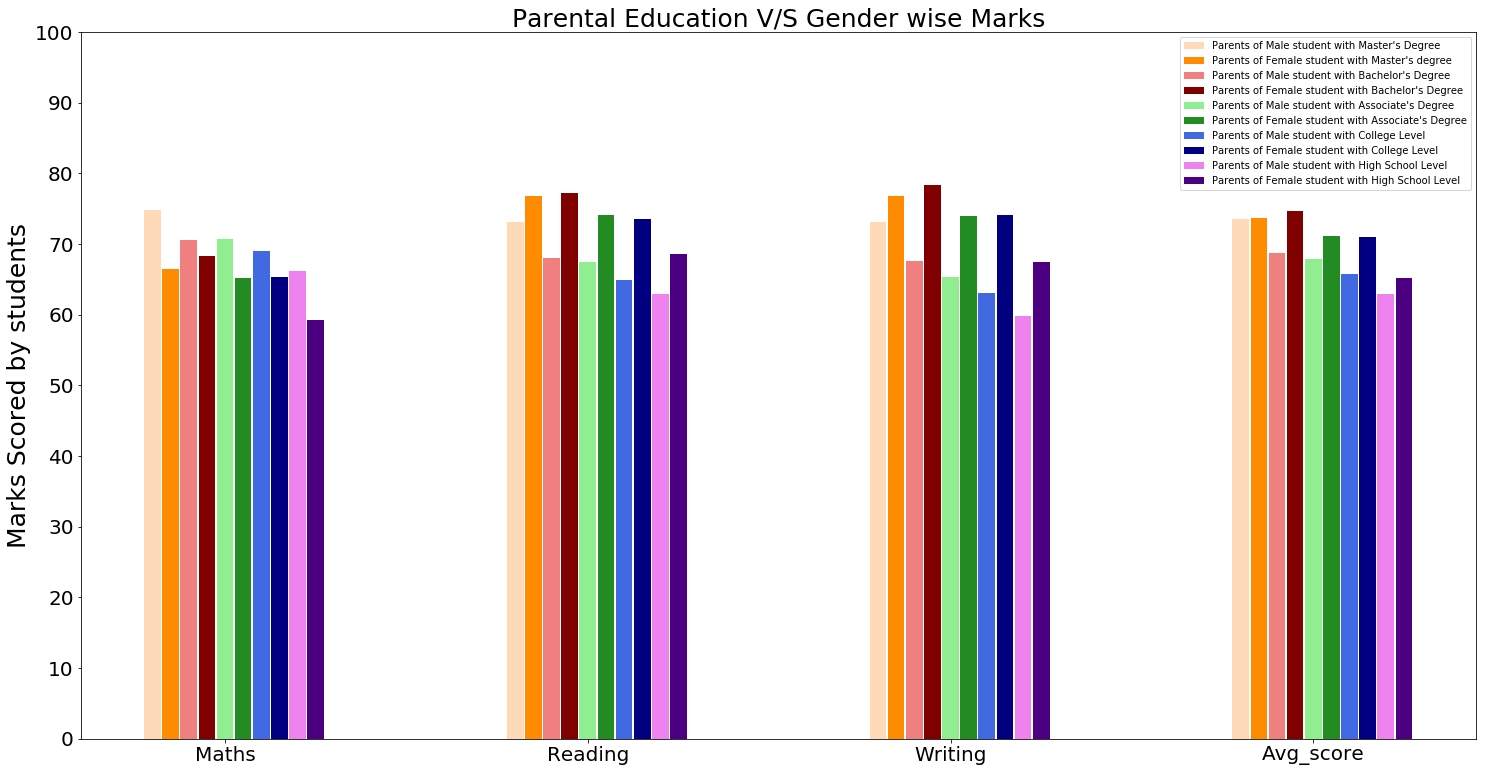

In [22]:
plt.rcParams['figure.figsize']=(25,13)

objects = ('Maths','Reading','Writing', 'Avg_score')
y_pos1 =[1,6,11,16]
y_pos2 =[1.25,6.25,11.25,16.25]
y_pos3 =[1.50,6.50,11.50,16.50]
y_pos4 =[1.75,6.75,11.75,16.75]
y_pos5 =[2,7,12,17]
y_pos6 =[2.25,7.25,12.25,17.25]
y_pos7 =[2.50,7.50,12.50,17.50]
y_pos8 =[2.75,7.75,12.75,17.75]
y_pos9 =[3,8,13,18]
y_pos10 =[3.25,8.25,13.25,18.25]

performance_1= [master_degree_maths1,master_degree_reading1,master_degree_reading1,master_degree_avg1]
performance_6= [master_degree_maths2,master_degree_reading2,master_degree_reading2,master_degree_avg2]

performance_2= [bachelor_degree_maths1,bachelor_degree_reading1,bachelor_degree_writing1,bachelor_degree_avg1]
performance_7= [bachelor_degree_maths2,bachelor_degree_reading2,bachelor_degree_writing2,bachelor_degree_avg2]

performance_3= [associate_degree_maths1,associate_degree_reading1,associate_degree_writing1,associate_degree_avg1]
performance_8= [associate_degree_maths2,associate_degree_reading2,associate_degree_writing2,associate_degree_avg2]

performance_4= [some_college_maths1,some_college_reading1,some_college_writing1,some_college_avg1]
performance_9= [some_college_maths2,some_college_reading2,some_college_writing2,some_college_avg2]

performance_5= [high_school_maths1,high_school_reading1,high_school_writing1,high_school_avg1]
performance_10= [high_school_maths2,high_school_reading2,high_school_writing2,high_school_avg2]


plt.bar(y_pos1, performance_1, width=0.23,color='peachpuff',label="Parents of Male student with Master's Degree")
plt.bar(y_pos2, performance_6,width=0.230,color='darkorange',label="Parents of Female student with Master's degree")

plt.bar(y_pos3, performance_2,width=0.230,color='lightcoral',label="Parents of Male student with Bachelor's Degree")
plt.bar(y_pos4, performance_7,width=0.230,color='maroon',label="Parents of Female student with Bachelor's Degree")

plt.bar(y_pos5, performance_3,width=0.230,color='lightgreen',label="Parents of Male student with Associate's Degree")
plt.bar(y_pos6, performance_8,width=0.230,color='forestgreen',label="Parents of Female student with Associate's Degree")

plt.bar(y_pos7, performance_4,width=0.230,color='royalblue',label="Parents of Male student with College Level")
plt.bar(y_pos8, performance_9,width=0.230,color='navy',label="Parents of Female student with College Level")

plt.bar(y_pos9, performance_5,width=0.230,color='violet',label="Parents of Male student with High School Level")
plt.bar(y_pos10, performance_10,width=0.230,color='indigo',label="Parents of Female student with High School Level")

plt.xticks(y_pos5, objects,fontsize=20)

score=np.arange(0,110,10)
plt.yticks(score,fontsize=20)

plt.ylabel('Marks Scored by students',fontsize=25)
plt.title('Parental Education V/S Gender wise Marks',fontsize=25)
plt.legend(loc="best") 
plt.show()

The above bar-graph shows the distribution of average marks of different subjects scored by male and female students on the basis of their parent's qualification.

We can observe that:
* In maths, male students have performed better than female students,whatever be there parent's qualification.
* In reading, female students have significantly better than male students,whatever be there parent's qualification.
* In writing, female students have significantly better than male students,whatever be there parent's qualification.

In [23]:
master_degree_groupa=master_degree[master_degree.ethnicity=='group A']
master_degree_groupb=master_degree[master_degree.ethnicity=='group B']
master_degree_groupc=master_degree[master_degree.ethnicity=='group C']
master_degree_groupd=master_degree[master_degree.ethnicity=='group D']
master_degree_groupe=master_degree[master_degree.ethnicity=='group E']

bachelor_degree_groupa=bachelor_degree[bachelor_degree.ethnicity=='group A']
bachelor_degree_groupb=bachelor_degree[bachelor_degree.ethnicity=='group B']
bachelor_degree_groupc=bachelor_degree[bachelor_degree.ethnicity=='group C']
bachelor_degree_groupd=bachelor_degree[bachelor_degree.ethnicity=='group D']
bachelor_degree_groupe=bachelor_degree[bachelor_degree.ethnicity=='group E']

associate_degree_groupa=associate_degree[associate_degree.ethnicity=='group A']
associate_degree_groupb=associate_degree[associate_degree.ethnicity=='group B']
associate_degree_groupc=associate_degree[associate_degree.ethnicity=='group C']
associate_degree_groupd=associate_degree[associate_degree.ethnicity=='group D']
associate_degree_groupe=associate_degree[associate_degree.ethnicity=='group E']

some_college_groupa=some_college[some_college.ethnicity=='group A']
some_college_groupb=some_college[some_college.ethnicity=='group B']
some_college_groupc=some_college[some_college.ethnicity=='group C']
some_college_groupd=some_college[some_college.ethnicity=='group D']
some_college_groupe=some_college[some_college.ethnicity=='group E']

high_school_groupa=high_school[high_school.ethnicity=='group A']
high_school_groupb=high_school[high_school.ethnicity=='group B']
high_school_groupc=high_school[high_school.ethnicity=='group C']
high_school_groupd=high_school[high_school.ethnicity=='group D']
high_school_groupe=high_school[high_school.ethnicity=='group E']


In [24]:
a1=[master_degree_groupa.ethnicity.count(),master_degree_groupb.ethnicity.count(),
    master_degree_groupc.ethnicity.count(),master_degree_groupd.ethnicity.count(),
    master_degree_groupe.ethnicity.count()]

a2=[bachelor_degree_groupa.ethnicity.count(),bachelor_degree_groupb.ethnicity.count(),
    bachelor_degree_groupc.ethnicity.count(),bachelor_degree_groupd.ethnicity.count(),
    bachelor_degree_groupe.ethnicity.count()]

a3=[associate_degree_groupa.ethnicity.count(),associate_degree_groupb.ethnicity.count(),
    associate_degree_groupc.ethnicity.count(),associate_degree_groupd.ethnicity.count(),
    associate_degree_groupe.ethnicity.count()]

a4=[some_college_groupa.ethnicity.count(),some_college_groupb.ethnicity.count(),
    some_college_groupc.ethnicity.count(),some_college_groupd.ethnicity.count(),
    some_college_groupe.ethnicity.count()]

a5=[high_school_groupa.ethnicity.count(),high_school_groupb.ethnicity.count(),
    high_school_groupc.ethnicity.count(),high_school_groupd.ethnicity.count(),
    high_school_groupe.ethnicity.count()]


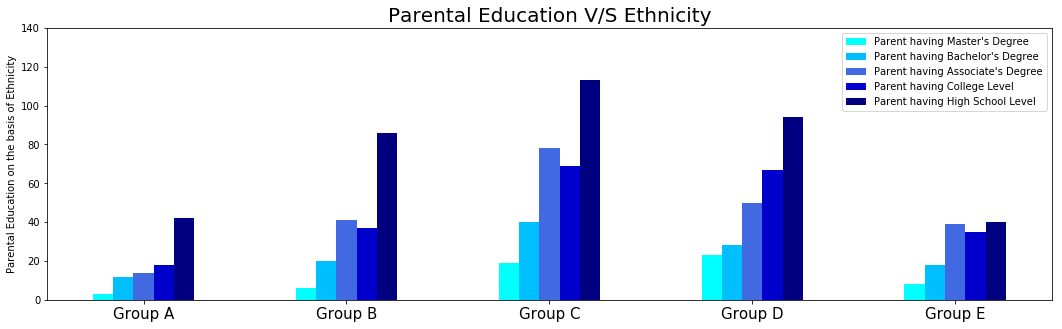

In [25]:
plt.rcParams['figure.figsize']=(18,5)

objects=('Group A','Group B','Group C','Group D','Group E')

x_pos1=[0,2,4,6,8]
x_pos2=[0.20,2.20,4.20,6.20,8.20]
x_pos3=[0.40,2.40,4.40,6.40,8.40]
x_pos4=[0.60,2.60,4.60,6.60,8.60]
x_pos5=[0.80,2.80,4.80,6.80,8.80]

plt.bar(x_pos1, a1,width=0.2,color='cyan',label="Parent having Master's Degree")
plt.bar(x_pos2, a2,width=0.2,color='deepskyblue',label="Parent having Bachelor's Degree")
plt.bar(x_pos3, a3,width=0.2,color='royalblue',label="Parent having Associate's Degree")
plt.bar(x_pos4, a4,width=0.2,color='mediumblue',label="Parent having College Level")
plt.bar(x_pos5, a5,width=0.2,color='navy',label="Parent having High School Level")

plt.xticks(x_pos3,objects,fontsize=15)
 
score=np.arange(0,160,20)
plt.yticks(score,fontsize=10)

plt.ylabel("Parental Education on the basis of Ethnicity",fontsize=10)
plt.title("Parental Education V/S Ethnicity",fontsize=20)
plt.legend(loc="best")
plt.show()


It clearly dipicts that the majority of parents are not so well-qualified.

* we can observe parents with Master's Degree are mininmum in every ethnic group. 

In [26]:
group_a_male=group_a[group_a.gender=='male']
group_b_male=group_b[group_b.gender=='male']
group_c_male=group_c[group_c.gender=='male']
group_d_male=group_d[group_d.gender=='male']
group_e_male=group_e[group_e.gender=='male']

group_a_female=group_a[group_a.gender=='female']
group_b_female=group_b[group_b.gender=='female']
group_c_female=group_c[group_c.gender=='female']
group_d_female=group_d[group_d.gender=='female']
group_e_female=group_e[group_e.gender=='female']

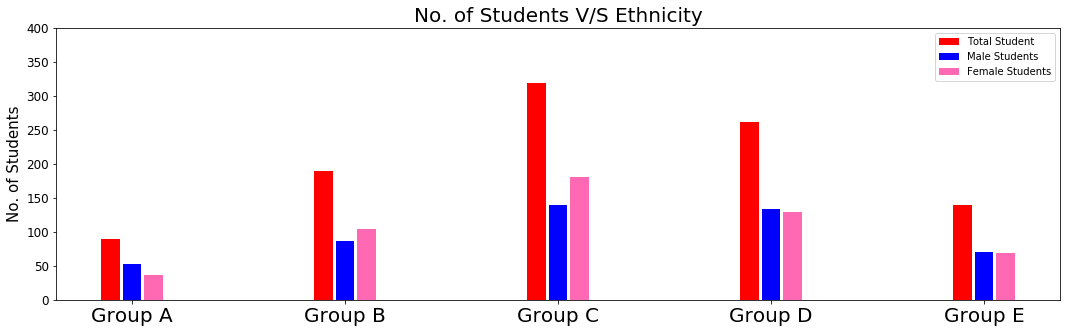

In [27]:
objects = ('Group A','Group B','Group C','Group D','Group E')
x_pos1 =[0,4,8,12,16]
x_pos2 =[0.40,4.40,8.40,12.40,16.40]
x_pos3 =[0.80,4.80,8.80,12.80,16.80]

t=[group_a.ethnicity.count(),group_b.ethnicity.count(),group_c.ethnicity.count(),group_d.ethnicity.count(),
   group_e.ethnicity.count()]
m=[group_a_male.gender.count(),group_b_male.gender.count(),group_c_male.gender.count(),group_d_male.gender.count(),
   group_e_male.gender.count()]
f=[group_a_female.gender.count(),group_b_female.gender.count(),group_c_female.gender.count(),group_d_female.gender.count(),
   group_e_female.gender.count()]
plt.bar(x_pos1, t,width=0.35,color='red',label="Total Student")
plt.bar(x_pos2, m,width=0.35,color='blue',label="Male Students")
plt.bar(x_pos3, f,width=0.35,color='hotpink',label="Female Students")

plt.xticks(x_pos2,objects,fontsize=20)

score=np.arange(0,450,50)
plt.yticks(score,fontsize=12)
plt.ylabel("No. of Students",fontsize=15)
plt.rcParams['figure.figsize']=(18,3)
plt.legend(loc="best")
plt.title("No. of Students V/S Ethnicity",fontsize=20)
plt.show()

It is comprehended that the class have majority of students from ethnic Group C,followed by Group D,Group B,Group E and Group A.

* The number of Female students is more in Group B and Group C.
* The number of Male students is more in Group A,Group D and Group E.